<a href="https://colab.research.google.com/github/virf96/Analisis_Texto/blob/master/Codo%2C_silhouette_%26_Davies_Bouldin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codo, silhouette & Davies Bouldin

## Preparación de ambiente

### Carga de módulos

In [ ]:
import pandas as pd
import cufflinks as cf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

cf.go_offline()

## Datos

### Carga de datos

In [ ]:
df = pd.read_pickle("./movies_tad.pickle")

In [ ]:
df

movieId                                      title  genre_action  \
0           1                           Toy Story (1995)             0   
1           2                             Jumanji (1995)             0   
2           3                    Grumpier Old Men (1995)             0   
3           4                   Waiting to Exhale (1995)             0   
4           5         Father of the Bride Part II (1995)             0   
...       ...                                        ...           ...   
9719   193581  Black Butler: Book of the Atlantic (2017)             1   
9720   193583               No Game No Life: Zero (2017)             0   
9721   193585                               Flint (2017)             0   
9722   193587        Bungo Stray Dogs: Dead Apple (2018)             1   
9723   193609        Andrew Dice Clay: Dice Rules (1991)             0   

      genre_adventure  genre_animation  genre_children  genre_comedy  \
0                   1                1               1             1   
1                   1                0               1             0   
2                   0                0               0             1   
3                   0                0               0             1   
4                   0                0               0             1   
...               ...              ...             ...           ...   
9719                0                1               0             1   
9720                0                1               0             1   
9721                0                0               0             0   
9722                0                1               0             0   
9723                0                0               0             1   

      genre_crime  genre_documentary  genre_drama  ...  genre_mystery  \
0               0                  0            0  ...              0   
1               0                  0            0  ...              0   
2               0                  0            0  ...              0   
3               0                  0            1  ...              0   
4               0                  0            0  ...              0   
...           ...                ...          ...  ...            ...   
9719            0                  0            0  ...              0   
9720            0                  0            0  ...              0   
9721            0                  0            1  ...              0   
9722            0                  0            0  ...              0   
9723            0                  0            0  ...              0   

      genre_no  genre_romance  genre_scifi  genre_thriller  genre_war  \
0            0              0            0               0          0   
1            0              0            0               0          0   
2            0              1            0               0          0   
3            0              1            0               0          0   
4            0              0            0               0          0   
...        ...            ...          ...             ...        ...   
9719         0              0            0               0          0   
9720         0              0            0               0          0   
9721         0              0            0               0          0   
9722         0              0            0               0          0   
9723         0              0            0               0          0   

      genre_western  rating_mean  rating_min  rating_max  
0                 0     3.920930         0.5         5.0  
1                 0     3.431818         0.5         5.0  
2                 0     3.259615         0.5         5.0  
3                 0     2.357143         1.0         3.0  
4                 0     3.071429         0.5         5.0  
...             ...          ...         ...         ...  
9719              0     4.000000         4.0         4.0  
9720              0     3.

In [ ]:
X = df.set_index(["movieId", "title"])

## Modelado

### Escalamiento

In [ ]:
sc = MinMaxScaler()

In [ ]:
Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [ ]:
Xs

genre_action  \
movieId title                                                     
1       Toy Story (1995)                                    0.0   
2       Jumanji (1995)                                      0.0   
3       Grumpier Old Men (1995)                             0.0   
4       Waiting to Exhale (1995)                            0.0   
5       Father of the Bride Part II (1995)                  0.0   
...                                                         ...   
193581  Black Butler: Book of the Atlantic (2017)           1.0   
193583  No Game No Life: Zero (2017)                        0.0   
193585  Flint (2017)                                        0.0   
193587  Bungo Stray Dogs: Dead Apple (2018)                 1.0   
193609  Andrew Dice Clay: Dice Rules (1991)                 0.0   

                                                   genre_adventure  \
movieId title                                                        
1       Toy Story (1995)                                       1.0   
2       Jumanji (1995)                                         1.0   
3       Grumpier Old Men (1995)                                0.0   
4       Waiting to Exhale (1995)                               0.0   
5       Father of the Bride Part II (1995)                     0.0   
...                                                            ...   
193581  Black Butler: Book of the Atlantic (2017)              0.0   
193583  No Game No Life: Zero (2017)                           0.0   
193585  Flint (2017)                                           0.0   
193587  Bungo Stray Dogs: Dead Apple (2018)                    0.0   
193609  Andrew Dice Clay: Dice Rules (1991)                    0.0   

                                                   genre_animation  \
movieId title                                                        
1       Toy Story (1995)                                       1.0   
2       Jumanji (1995)                                         0.0   
3       Grumpier Old Men (1995)                                0.0   
4       Waiting to Exhale (1995)                               0.0   
5       Father of the Bride Part II (1995)                     0.0   
...                                                            ...   
193581  Black Butler: Book of the Atlantic (2017)              1.0   
193583  No Game No Life: Zero (2017)                           1.0   
193585  Flint (2017)                                           0.0   
193587  Bungo Stray Dogs: Dead Apple (2018)                    1.0   
193609  Andrew Dice Clay: Dice Rules (1991)                    0.0   

                                                   genre_children  \
movieId title                                                       
1       Toy Story (1995)                                      1.0   
2       Jumanji (1995)                                        1.0   
3       Grumpier Old Men (1995)                               0.0   
4       Waiting to Exhale (1995)                              0.0   
5       Father of the Bride Part II (1995)                    0.0   
...                                                           ...   
193581  Black Butler: Book of the Atlantic (2017)             0.0   
193583  No Game No Life: Zero (2017)                          0.0   
193585  Flint (2017)                                          0.0   
193587  Bungo Stray Dogs: Dead Apple (2018)                   0.0   
193609  Andrew Dice Clay: Dice Rules (1991)                   0.0   

                                                   genre_comedy  genre_crime  \
movieId title                                                                  
1       Toy Story (1995)                                    1.0          0.0   
2       Jumanji (1995)                                      0.0          0.0   
3       Grumpier Old Men (1995)                             1.0          0.0   
4       Waiting to Exhale (1995)                           

### Reducción de dimensiones

In [ ]:
pca = PCA(n_components=3)

In [ ]:
Xp = pd.DataFrame(data=pca.fit_transform(Xs), index = Xs.index, columns=["d1", "d2", "d3"])

In [ ]:
Xp

d1        d2  \
movieId title                                                           
1       Toy Story (1995)                           1.097378  0.258106   
2       Jumanji (1995)                             0.343721  0.533569   
3       Grumpier Old Men (1995)                    0.820947 -0.437840   
4       Waiting to Exhale (1995)                   0.203304 -0.929319   
5       Father of the Bride Part II (1995)         0.771343 -0.124899   
...                                                     ...       ...   
193581  Black Butler: Book of the Atlantic (2017)  0.809957  0.345650   
193583  No Game No Life: Zero (2017)               0.868908 -0.081156   
193585  Flint (2017)                              -0.586936 -0.397864   
193587  Bungo Stray Dogs: Dead Apple (2018)        0.088745  0.621169   
193609  Andrew Dice Clay: Dice Rules (1991)        0.705982 -0.237328   

                                                         d3  
movieId title                                                
1       Toy Story (1995)                           0.950189  
2       Jumanji (1995)                             0.966196  
3       Grumpier Old Men (1995)                   -0.188658  
4       Waiting to Exhale (1995)                  -0.072240  
5       Father of the Bride Part II (1995)        -0.226286  
...                                                     ...  
193581  Black Butler: Book of the Atlantic (2017)  0.475246  
193583  No Game No Life: Zero (2017)               0.198809  
193585  Flint (2017)                               0.160055  
193587  Bungo Stray Dogs: Dead Apple (2018)        0.451915  
193609  Andrew Dice Clay: Dice Rules (1991)       -0.210667  

[9724 rows x 3 columns]

### Visualización

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([0.17436834, 0.32566874, 0.4168811 ])

In [ ]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", mode="markers", text="title")

In [ ]:
Xp

d1        d2  \
movieId title                                                           
1       Toy Story (1995)                           1.097378  0.258106   
2       Jumanji (1995)                             0.343721  0.533569   
3       Grumpier Old Men (1995)                    0.820947 -0.437840   
4       Waiting to Exhale (1995)                   0.203304 -0.929319   
5       Father of the Bride Part II (1995)         0.771343 -0.124899   
...                                                     ...       ...   
193581  Black Butler: Book of the Atlantic (2017)  0.809957  0.345650   
193583  No Game No Life: Zero (2017)               0.868908 -0.081156   
193585  Flint (2017)                              -0.586936 -0.397864   
193587  Bungo Stray Dogs: Dead Apple (2018)        0.088745  0.621169   
193609  Andrew Dice Clay: Dice Rules (1991)        0.705982 -0.237328   

                                                         d3  
movieId title                                                
1       Toy Story (1995)                           0.950189  
2       Jumanji (1995)                             0.966196  
3       Grumpier Old Men (1995)                   -0.188658  
4       Waiting to Exhale (1995)                  -0.072240  
5       Father of the Bride Part II (1995)        -0.226286  
...                                                     ...  
193581  Black Butler: Book of the Atlantic (2017)  0.475246  
193583  No Game No Life: Zero (2017)               0.198809  
193585  Flint (2017)                               0.160055  
193587  Bungo Stray Dogs: Dead Apple (2018)        0.451915  
193609  Andrew Dice Clay: Dice Rules (1991)       -0.210667  

[9724 rows x 3 columns]

### Selección de número óptimo de clusters

#### Generación de clusters

In [ ]:
KMeans?

In [ ]:
sse,db,slc = {}, {}, {}
for k in range(2, 15):
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=10, n_jobs=-1).fit(Xp)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(Xp,clusters)
    slc[k] = silhouette_score(Xp,clusters)

#### Método del codo  (Inercia)

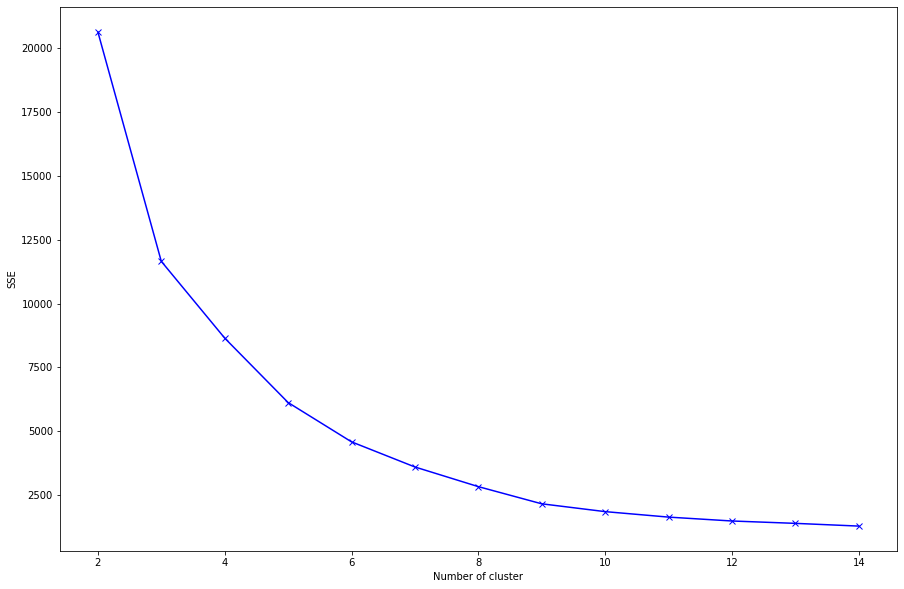

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Davies-Bouldin

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

#### Silhouette

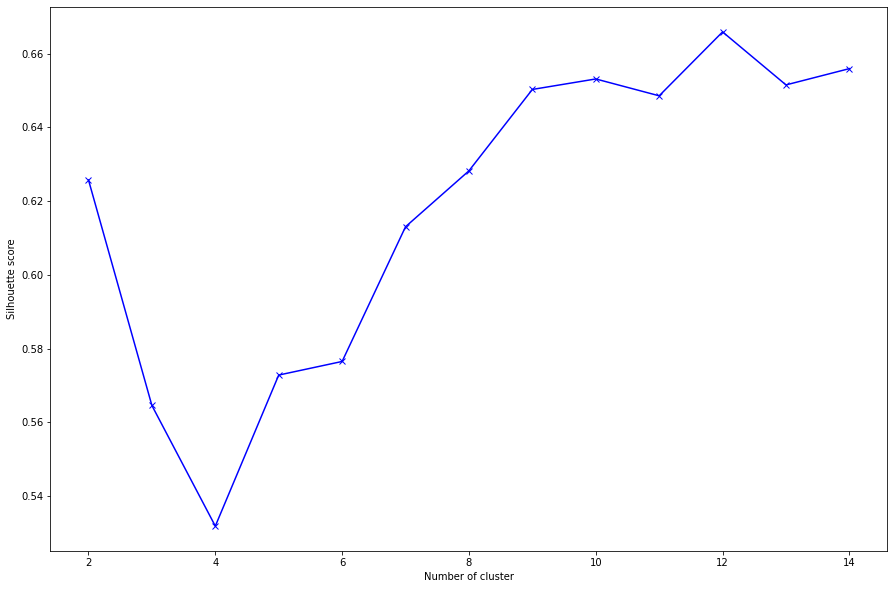

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

### K-Means

#### Entrenamiento de modelo

In [ ]:
cluster = KMeans(n_clusters=12, n_jobs=-1, random_state=10)

In [ ]:
X["cl"] = Xs["cl"] = Xp["cl"] = [str(x) for x in cluster.fit_predict(Xp)]

#### Visualización

In [ ]:
Xp.reset_index().iplot(kind="scatter", x="d1", y="d2", categories="cl", mode="markers", text="title")

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/home/oscar/VirtualEnvs/Python 3/lib/python3.7/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



#### Perfilamiento

In [ ]:
X.groupby("cl").mean().style.background_gradient(cmap='Blues')